In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2019.csv')
df

,Unnamed: 0,geography,civic_education,chemistry,physics,foreign_language_code,foreign_language_score,biology,history,mathematics,literature,student_id
0,0,7.75,8.75,NaN,NaN,N1,7.6,NaN,8.25,8.2,8.00,24008611
1,1,NaN,NaN,4.5,8.25,N1,8.0,6.00,NaN,8.6,6.17,51000032
2,2,4.25,5.75,NaN,NaN,NaN,NaN,NaN,4.00,5.2,4.75,51000005
3,3,4.75,5.00,NaN,NaN,NaN,NaN,NaN,2.25,4.4,4.50,51000021
4,4,8.25,7.50,NaN,NaN,N1,4.4,NaN,7.75,5.8,6.00,51000013
...,...,...,...,...,...,...,...,...,...,...,...,...
811846,811846,5.75,8.50,NaN,NaN,N1,3.4,NaN,4.50,4.4,4.75,26019104
811847,811847,NaN,NaN,4.5,3.75,N1,4.4,4.00,NaN,5.2,6.25,26019102
811848,811848,5.50,8.00,NaN,NaN,N1,2.8,NaN,5.50,2.8,5.00,26019099
811849,811849,6.75,8.50,NaN,NaN,N1,4.0,NaN,3.50,6.2,7.25,26019101


In [ ]:
df.isna().sum() #ข้อมูลที่หายไปแต่ละคอลัม (null)

Unnamed: 0                     0
geography                 275954
civic_education           340946
chemistry                 516307
physics                   519685
foreign_language_code      83338
foreign_language_score     83338
biology                   520652
history                   269122
mathematics                 4089
literature                 12643
student_id                     0
dtype: int64

Natural Science: 296980
Social Science: 542894
Took all subjects: 28023


Text(0.5, 1.0, 'Bar Chart of Combination Exam Selection')

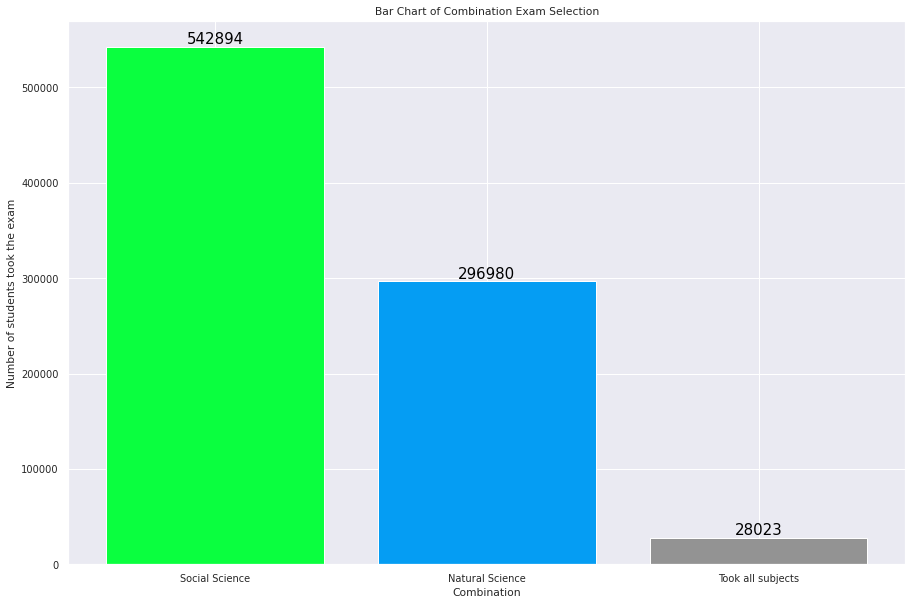

In [ ]:

# Natural Science
sum_of_NS = sum((df.physics >= 0) | (df.chemistry >= 0) | (df.biology >= 0))
print("Natural Science:",sum_of_NS)

# Social Science
sum_of_SS = sum((df.history >= 0) | (df.geography >= 0) | (df.civic_education >= 0))
print("Social Science:", sum_of_SS)

# Took all subjects
sum_of_Took_all_subjects = sum(df.student_id >= 0) - sum_of_NS - sum_of_SS
print("Took all subjects:", sum_of_Took_all_subjects*(-1))

# Bar chart for combination exam selection
labels = ["Social Science", "Natural Science", "Took all subjects"]
count = [sum_of_SS, sum_of_NS, sum_of_Took_all_subjects*(-1)]
colors = ["#0AFF3F", "#059DF3" ,"#939393"]

plt.figure(figsize = (15, 10))
counts_grouped = plt.bar(labels, count, color = colors)

for counts in counts_grouped.patches:
  bar_height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / bar_height + bar_height
  plt.text(label_x, label_y, s = f"{bar_height:}", ha='center', va='bottom', color = "black", size = 15)

plt.xlabel("Combination")
plt.ylabel("Number of students took the exam")
plt.title("Bar Chart of Combination Exam Selection")

In [ ]:
new_df = df.drop(['Unnamed: 0','student_id'],axis=1)

In [ ]:
new_df

,geography,civic_education,chemistry,physics,foreign_language_code,foreign_language_score,biology,history,mathematics,literature
0,7.75,8.75,NaN,NaN,N1,7.6,NaN,8.25,8.2,8.00
1,NaN,NaN,4.5,8.25,N1,8.0,6.00,NaN,8.6,6.17
2,4.25,5.75,NaN,NaN,NaN,NaN,NaN,4.00,5.2,4.75
3,4.75,5.00,NaN,NaN,NaN,NaN,NaN,2.25,4.4,4.50
4,8.25,7.50,NaN,NaN,N1,4.4,NaN,7.75,5.8,6.00
...,...,...,...,...,...,...,...,...,...,...
811846,5.75,8.50,NaN,NaN,N1,3.4,NaN,4.50,4.4,4.75
811847,NaN,NaN,4.5,3.75,N1,4.4,4.00,NaN,5.2,6.25
811848,5.50,8.00,NaN,NaN,N1,2.8,NaN,5.50,2.8,5.00
811849,6.75,8.50,NaN,NaN,N1,4.0,NaN,3.50,6.2,7.25


#**กลุ่มวิชาวิทยาศาสตร์**

In [ ]:
#Natural Science
Natural_Science_df = df[['physics','chemistry','biology','mathematics','literature','foreign_language_code','foreign_language_score']].copy()
Natural_Science_df


,physics,chemistry,biology,mathematics,literature,foreign_language_code,foreign_language_score
0,NaN,NaN,NaN,8.2,8.00,N1,7.6
1,8.25,4.5,6.00,8.6,6.17,N1,8.0
2,NaN,NaN,NaN,5.2,4.75,NaN,NaN
3,NaN,NaN,NaN,4.4,4.50,NaN,NaN
4,NaN,NaN,NaN,5.8,6.00,N1,4.4
...,...,...,...,...,...,...,...
811846,NaN,NaN,NaN,4.4,4.75,N1,3.4
811847,3.75,4.5,4.00,5.2,6.25,N1,4.4
811848,NaN,NaN,NaN,2.8,5.00,N1,2.8
811849,NaN,NaN,NaN,6.2,7.25,N1,4.0


In [ ]:
Natural_Science_cleaned = Natural_Science_df.dropna()
Natural_Science_cleaned

,physics,chemistry,biology,mathematics,literature,foreign_language_code,foreign_language_score
1,8.25,4.50,6.00,8.6,6.17,N1,8.0
5,7.50,5.75,3.00,7.2,6.75,N1,4.4
8,5.50,3.50,3.75,5.6,4.50,N1,2.2
14,7.00,5.00,4.75,7.0,6.25,N1,3.6
15,8.00,6.75,6.25,7.8,7.25,N1,8.8
...,...,...,...,...,...,...,...
811829,5.50,5.50,3.75,6.6,4.00,N1,2.8
811839,5.25,4.50,5.75,6.2,4.50,N1,3.8
811844,4.25,3.25,5.50,5.4,5.75,N1,3.2
811847,3.75,4.50,4.00,5.2,6.25,N1,4.4


In [ ]:
Natural_Science_cleaned.isna().sum()

physics                   0
chemistry                 0
biology                   0
mathematics               0
literature                0
foreign_language_code     0
foreign_language_score    0
dtype: int64

In [ ]:
Natural_Science_cleaned.describe()

,physics,chemistry,biology,mathematics,literature,foreign_language_score
count,279227.000000,279227.000000,279227.000000,279227.000000,279227.000000,279227.000000
mean,5.614924,5.379499,4.673221,6.871589,5.649038,4.756504
std,1.582108,1.562125,1.220696,1.303418,1.081467,1.773535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,4.250000,3.750000,6.200000,5.000000,3.400000
50%,5.750000,5.500000,4.500000,7.000000,5.750000,4.400000
75%,6.750000,6.500000,5.250000,7.800000,6.500000,5.800000
max,10.000000,10.000000,10.000000,10.000000,9.500000,10.000000


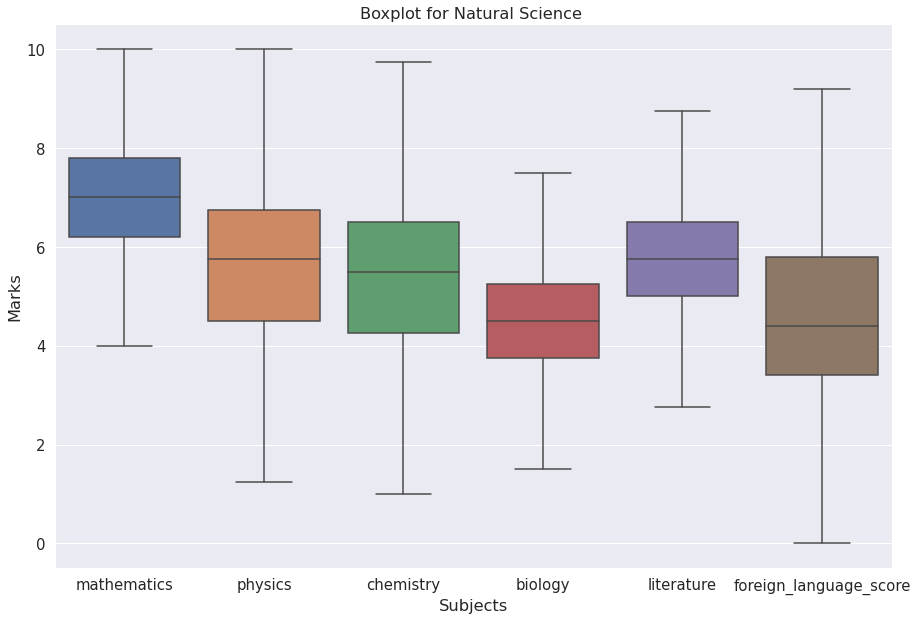

In [ ]:
plt.figure(figsize = (15, 10))
sns.set(font_scale = 1.35)
dataset = pd.DataFrame(data = Natural_Science_cleaned, columns = ["mathematics", "physics", "chemistry", "biology",
                        "literature", "foreign_language_score"])
boxplot_dataset = sns.boxplot(x="variable", y="value", data=pd.melt(dataset), showfliers = False)
boxplot_dataset.set_xlabel("Subjects")
boxplot_dataset.set_ylabel("Marks")
plt.title("Boxplot for Natural Science ")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '10 Point Distributions (Natural_Science)')

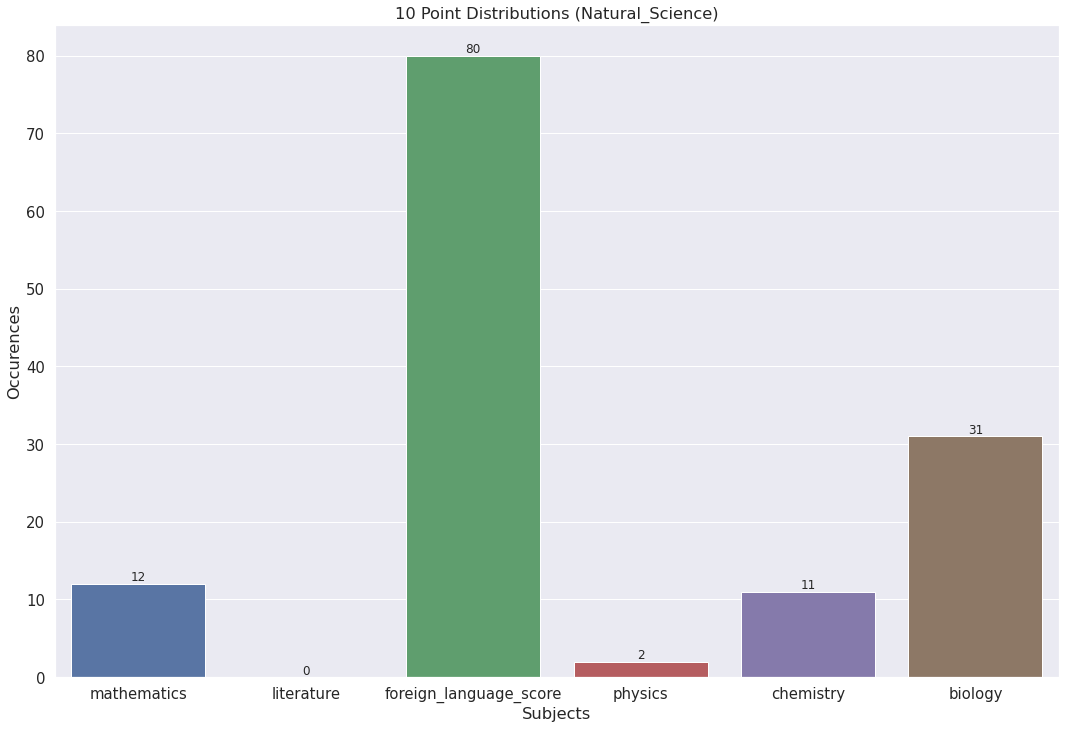

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

math_10_score = sum(Natural_Science_cleaned.mathematics == 10)
literature_10_score = sum(Natural_Science_cleaned.literature == 10)
foreign_language_score_10_score = sum(Natural_Science_cleaned.foreign_language_score == 10)
physics_10_score = sum(Natural_Science_cleaned.physics == 10)
chemistry_10_score = sum(Natural_Science_cleaned.chemistry == 10)
biology_10_score = sum(Natural_Science_cleaned.biology == 10)


labels_10_score = ["mathematics", "literature", "foreign_language_score", "physics", "chemistry", "biology"]
counts_10_score = [math_10_score, literature_10_score, foreign_language_score_10_score, physics_10_score, chemistry_10_score,
                    biology_10_score]

fig, ax = plt.subplots(figsize = (18, 12))
sns.set(font_scale = 1.35)
score_10_grouped = sns.barplot(labels_10_score, counts_10_score)
score_10_grouped.set_xticklabels(score_10_grouped.get_xticklabels())

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, ha='center', va='bottom')
plt.xlabel("Subjects")
plt.ylabel("Occurences")
plt.title("10 Point Distributions (Natural_Science)")

# New


In [ ]:
df_copyNS = Natural_Science_cleaned[['physics'	,'chemistry',	'biology',	'mathematics',	'literature','foreign_language_score']].copy()
df_copyNS

,physics,chemistry,biology,mathematics,literature,foreign_language_score
1,8.25,4.50,6.00,8.6,6.17,8.0
5,7.50,5.75,3.00,7.2,6.75,4.4
8,5.50,3.50,3.75,5.6,4.50,2.2
14,7.00,5.00,4.75,7.0,6.25,3.6
15,8.00,6.75,6.25,7.8,7.25,8.8
...,...,...,...,...,...,...
811829,5.50,5.50,3.75,6.6,4.00,2.8
811839,5.25,4.50,5.75,6.2,4.50,3.8
811844,4.25,3.25,5.50,5.4,5.75,3.2
811847,3.75,4.50,4.00,5.2,6.25,4.4


In [ ]:
df_copyNS["mean_score"] =df_copyNS[df_copyNS.columns[:]].mean(axis=1)
df_copyNS

,physics,chemistry,biology,mathematics,literature,foreign_language_score,mean_score
1,8.25,4.50,6.00,8.6,6.17,8.0,6.920000
5,7.50,5.75,3.00,7.2,6.75,4.4,5.766667
8,5.50,3.50,3.75,5.6,4.50,2.2,4.175000
14,7.00,5.00,4.75,7.0,6.25,3.6,5.600000
15,8.00,6.75,6.25,7.8,7.25,8.8,7.475000
...,...,...,...,...,...,...,...
811829,5.50,5.50,3.75,6.6,4.00,2.8,4.691667
811839,5.25,4.50,5.75,6.2,4.50,3.8,5.000000
811844,4.25,3.25,5.50,5.4,5.75,3.2,4.558333
811847,3.75,4.50,4.00,5.2,6.25,4.4,4.683333


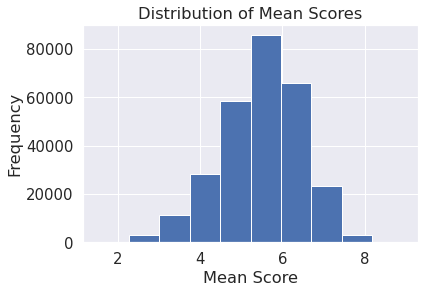

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of the mean_score column
plt.hist(df_copyNS["mean_score"])
plt.xlabel("Mean Score")
plt.ylabel("Frequency")
plt.title("Distribution of Mean Scores")
plt.show()

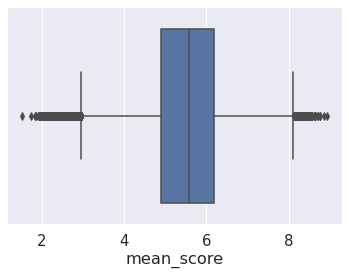

In [ ]:
import seaborn as sns
sns.boxplot(x=df_copyNS["mean_score"])



In [ ]:
high_threshold = df_copyNS['mean_score'].mean() + df_copyNS['mean_score'].std()
low_threshold = df_copyNS['mean_score'].mean() - df_copyNS['mean_score'].std()

In [ ]:
high_threshold

6.46337073302742

In [ ]:
low_threshold

4.518220911047114

In [ ]:
df_copyNS['performance_level'] = ['high' if score >= high_threshold else 'low' if score <= low_threshold else 'medium' for score in df_copyNS["mean_score"]]

In [ ]:
# df_copyNS['mean_score'].std()

In [ ]:
# thresholds = {
#     "high": 7,
#     "low": 4
# }


In [ ]:
# df_copyNS["performance_level"] = "low"
# df_copyNS.loc[(df_copyNS["mean_score"] >= thresholds["low"]) & (df_copyNS["mean_score"] < thresholds["high"]), "performance_level"] = "medium"
# df_copyNS.loc[df_copyNS["mean_score"] >= thresholds["high"], "performance_level"] = "high"

In [ ]:
df_copyNS

,physics,chemistry,biology,mathematics,literature,foreign_language_score,mean_score,performance_level
1,8.25,4.50,6.00,8.6,6.17,8.0,6.920000,high
5,7.50,5.75,3.00,7.2,6.75,4.4,5.766667,medium
8,5.50,3.50,3.75,5.6,4.50,2.2,4.175000,low
14,7.00,5.00,4.75,7.0,6.25,3.6,5.600000,medium
15,8.00,6.75,6.25,7.8,7.25,8.8,7.475000,high
...,...,...,...,...,...,...,...,...
811829,5.50,5.50,3.75,6.6,4.00,2.8,4.691667,medium
811839,5.25,4.50,5.75,6.2,4.50,3.8,5.000000,medium
811844,4.25,3.25,5.50,5.4,5.75,3.2,4.558333,medium
811847,3.75,4.50,4.00,5.2,6.25,4.4,4.683333,medium


In [ ]:
performance_level_counts = df_copyNS['performance_level'].value_counts()
print(performance_level_counts)

medium    191278
low        44589
high       43360
Name: performance_level, dtype: int64


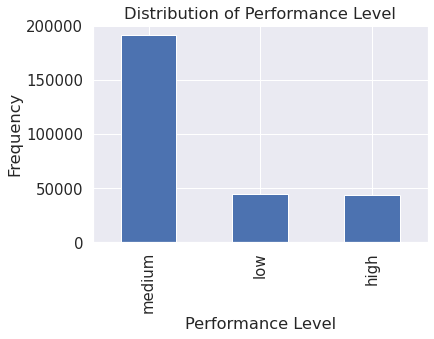

In [ ]:
import matplotlib.pyplot as plt

# Plot a bar chart of the performance_level counts
performance_level_counts.plot(kind='bar')
plt.xlabel("Performance Level")
plt.ylabel("Frequency")
plt.title("Distribution of Performance Level")
plt.show()

In [ ]:
df_copyNS['label'] = df_copyNS['performance_level'].replace({"low": 0, "medium": 1, "high": 2})
df_copyNS

,physics,chemistry,biology,mathematics,literature,foreign_language_score,mean_score,performance_level,label
1,8.25,4.50,6.00,8.6,6.17,8.0,6.920000,high,2
5,7.50,5.75,3.00,7.2,6.75,4.4,5.766667,medium,1
8,5.50,3.50,3.75,5.6,4.50,2.2,4.175000,low,0
14,7.00,5.00,4.75,7.0,6.25,3.6,5.600000,medium,1
15,8.00,6.75,6.25,7.8,7.25,8.8,7.475000,high,2
...,...,...,...,...,...,...,...,...,...
811829,5.50,5.50,3.75,6.6,4.00,2.8,4.691667,medium,1
811839,5.25,4.50,5.75,6.2,4.50,3.8,5.000000,medium,1
811844,4.25,3.25,5.50,5.4,5.75,3.2,4.558333,medium,1
811847,3.75,4.50,4.00,5.2,6.25,4.4,4.683333,medium,1


In [ ]:
X = df_copyNS.drop(['mean_score', 'performance_level','label'], axis=1)

In [ ]:
X

,physics,chemistry,biology,mathematics,literature,foreign_language_score
1,8.25,4.50,6.00,8.6,6.17,8.0
5,7.50,5.75,3.00,7.2,6.75,4.4
8,5.50,3.50,3.75,5.6,4.50,2.2
14,7.00,5.00,4.75,7.0,6.25,3.6
15,8.00,6.75,6.25,7.8,7.25,8.8
...,...,...,...,...,...,...
811829,5.50,5.50,3.75,6.6,4.00,2.8
811839,5.25,4.50,5.75,6.2,4.50,3.8
811844,4.25,3.25,5.50,5.4,5.75,3.2
811847,3.75,4.50,4.00,5.2,6.25,4.4


In [ ]:
y = df_copyNS['label']
y

1         2
5         1
8         0
14        1
15        2
         ..
811829    1
811839    1
811844    1
811847    1
811850    1
Name: label, Length: 279227, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # initialize a dictionary to store the models and their accuracy scores
# models = {'Random Forest': RandomForestClassifier(),
#           'Support Vector Machine': SVC(),
#           'K-Nearest Neighbors': KNeighborsClassifier(),
#           'Naive Bayes': GaussianNB(),
#           }

# # loop through the models and fit them to the training data
# for name, model in models.items():
#     model.fit(X_train, y_train)

#     # make predictions on the test data and calculate the accuracy score
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)

#     # store the accuracy score for each model
#     models[name] = accuracy

# # find the model with the highest accuracy
# best_model = max(models, key=models.get)

# print(f'The best model is {best_model} with an accuracy of {models[best_model]}')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train multiple models
models = [RandomForestClassifier(), SVC(), KNeighborsClassifier(), GaussianNB()]
model_names = ['RandomForest', 'SVM', 'KNN', 'NaiveBayes']

for idx, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_names[idx]} Accuracy: {accuracy}')

RandomForest Accuracy: 0.9768191437408432
SVM Accuracy: 0.9987736719301101
KNN Accuracy: 0.9783167833306202
NaiveBayes Accuracy: 0.9488414998100819


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy}')

# Generate classification report
report = classification_report(y_test, y_pred,labels=[0,1,2],target_names=df_copyNS['performance_level'].unique())
print(f'SVM Classification Report:\n{report}')

# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(f'SVM Confusion Matrix:\n{confusion}')

SVM Accuracy: 0.9987736719301101
SVM Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00     14723
      medium       1.00      1.00      1.00     63186
         low       1.00      1.00      1.00     14236

    accuracy                           1.00     92145
   macro avg       1.00      1.00      1.00     92145
weighted avg       1.00      1.00      1.00     92145

SVM Confusion Matrix:
[[14691    32     0]
 [   13 63150    23]
 [    0    45 14191]]


Text(0.5, 1.0, 'CONFUSION MATRIX - SVC\n')

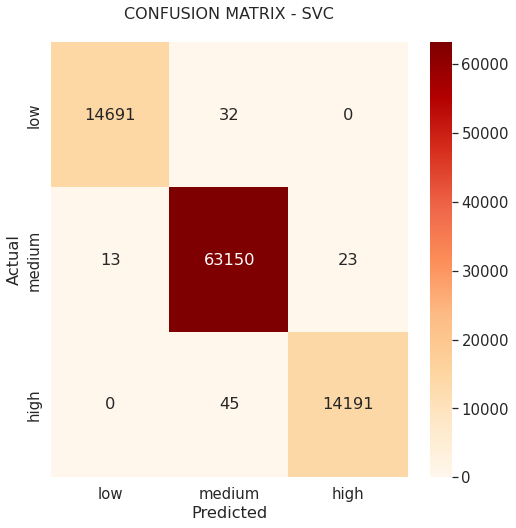

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred,labels=[0,1,2])
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat,annot=True,cmap="OrRd", fmt='d',xticklabels= ['low','medium','high'],yticklabels=['low','medium','high'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('CONFUSION MATRIX - SVC\n',size=16)

In [ ]:
# physics	chemistry	biology	mathematics	literature	foreign_language_score
new_example = [[1.0, 2.0, 3.0, 4.0,5.0,4.0]]

new_example_class = svm_model.predict(new_example)

if new_example_class == 0:
  print('Low')
elif new_example_class == 1:
  print('Medium')
else:
  print('High')


Low


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# **กลุ่มสังคมศาสตร์**

In [ ]:
#Social Science
Social_Science_df = df[['geography','civic_education','history','mathematics','literature','foreign_language_code','foreign_language_score']].copy()
Social_Science_df

,geography,civic_education,history,mathematics,literature,foreign_language_code,foreign_language_score
0,7.75,8.75,8.25,8.2,8.00,N1,7.6
1,NaN,NaN,NaN,8.6,6.17,N1,8.0
2,4.25,5.75,4.00,5.2,4.75,NaN,NaN
3,4.75,5.00,2.25,4.4,4.50,NaN,NaN
4,8.25,7.50,7.75,5.8,6.00,N1,4.4
...,...,...,...,...,...,...,...
811846,5.75,8.50,4.50,4.4,4.75,N1,3.4
811847,NaN,NaN,NaN,5.2,6.25,N1,4.4
811848,5.50,8.00,5.50,2.8,5.00,N1,2.8
811849,6.75,8.50,3.50,6.2,7.25,N1,4.0


In [ ]:
Social_Science_df_cleaned = Social_Science_df.dropna()
Social_Science_df_cleaned

,geography,civic_education,history,mathematics,literature,foreign_language_code,foreign_language_score
0,7.75,8.75,8.25,8.2,8.00,N1,7.6
4,8.25,7.50,7.75,5.8,6.00,N1,4.4
7,6.25,8.75,5.25,5.0,6.50,N1,8.8
9,7.50,8.50,3.25,6.6,7.00,N1,5.2
10,7.25,9.00,7.00,7.4,9.00,N1,4.8
...,...,...,...,...,...,...,...
811843,5.25,4.50,3.25,3.8,4.25,N1,2.4
811845,5.25,6.00,2.75,3.6,1.75,N1,1.8
811846,5.75,8.50,4.50,4.4,4.75,N1,3.4
811848,5.50,8.00,5.50,2.8,5.00,N1,2.8


In [ ]:
Social_Science_df_cleaned.isna().sum()

geography                 0
civic_education           0
history                   0
mathematics               0
literature                0
foreign_language_code     0
foreign_language_score    0
dtype: int64

In [ ]:
Social_Science_df_cleaned.describe()

,geography,civic_education,history,mathematics,literature,foreign_language_score
count,469543.000000,469543.000000,469543.000000,469543.000000,469543.000000,469543.000000
mean,6.084327,7.355038,4.361497,5.059856,5.504525,3.898634
std,1.183842,1.267744,1.418786,1.506969,1.358596,1.641612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,6.500000,3.250000,4.000000,4.750000,2.800000
50%,6.000000,7.500000,4.250000,5.000000,5.500000,3.400000
75%,7.000000,8.250000,5.250000,6.200000,6.500000,4.600000
max,10.000000,10.000000,10.000000,9.800000,9.500000,10.000000


# **New**

In [ ]:
df_copySS = Social_Science_df_cleaned[['geography'	,'civic_education',	'history',	'mathematics',	'literature','foreign_language_score']].copy()
df_copySS

,geography,civic_education,history,mathematics,literature,foreign_language_score
0,7.75,8.75,8.25,8.2,8.00,7.6
4,8.25,7.50,7.75,5.8,6.00,4.4
7,6.25,8.75,5.25,5.0,6.50,8.8
9,7.50,8.50,3.25,6.6,7.00,5.2
10,7.25,9.00,7.00,7.4,9.00,4.8
...,...,...,...,...,...,...
811843,5.25,4.50,3.25,3.8,4.25,2.4
811845,5.25,6.00,2.75,3.6,1.75,1.8
811846,5.75,8.50,4.50,4.4,4.75,3.4
811848,5.50,8.00,5.50,2.8,5.00,2.8


In [ ]:
df_copySS["mean_score"] =df_copySS[df_copySS.columns[:]].mean(axis=1)
df_copySS

,geography,civic_education,history,mathematics,literature,foreign_language_score,mean_score
0,7.75,8.75,8.25,8.2,8.00,7.6,8.091667
4,8.25,7.50,7.75,5.8,6.00,4.4,6.616667
7,6.25,8.75,5.25,5.0,6.50,8.8,6.758333
9,7.50,8.50,3.25,6.6,7.00,5.2,6.341667
10,7.25,9.00,7.00,7.4,9.00,4.8,7.408333
...,...,...,...,...,...,...,...
811843,5.25,4.50,3.25,3.8,4.25,2.4,3.908333
811845,5.25,6.00,2.75,3.6,1.75,1.8,3.525000
811846,5.75,8.50,4.50,4.4,4.75,3.4,5.216667
811848,5.50,8.00,5.50,2.8,5.00,2.8,4.933333


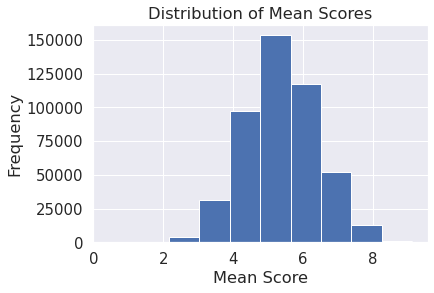

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of the mean_score column
plt.hist(df_copySS["mean_score"])
plt.xlabel("Mean Score")
plt.ylabel("Frequency")
plt.title("Distribution of Mean Scores")
plt.show()

In [ ]:
high_threshold = df_copySS['mean_score'].mean() + df_copySS['mean_score'].std()
low_threshold = df_copySS['mean_score'].mean() - df_copySS['mean_score'].std()

In [ ]:
high_threshold

6.40805816696484

In [ ]:
low_threshold

4.346567593260175

In [ ]:
df_copySS['performance_level'] = ['high' if score >= high_threshold else 'low' if score <= low_threshold else 'medium' for score in df_copySS["mean_score"]]

In [ ]:
# df_copySS["performance_level"] = "low"
# df_copySS.loc[(df_copySS["mean_score"] >= thresholds["low"]) & (df_copySS["mean_score"] < thresholds["high"]), "performance_level"] = "medium"
# df_copySS.loc[df_copySS["mean_score"] >= thresholds["high"], "performance_level"] = "high"

In [ ]:
# thresholds = {
#     "high": 7,
#     "low": 4
# }


In [ ]:
df_copySS

,geography,civic_education,history,mathematics,literature,foreign_language_score,mean_score,performance_level
0,7.75,8.75,8.25,8.2,8.00,7.6,8.091667,high
4,8.25,7.50,7.75,5.8,6.00,4.4,6.616667,high
7,6.25,8.75,5.25,5.0,6.50,8.8,6.758333,high
9,7.50,8.50,3.25,6.6,7.00,5.2,6.341667,medium
10,7.25,9.00,7.00,7.4,9.00,4.8,7.408333,high
...,...,...,...,...,...,...,...,...
811843,5.25,4.50,3.25,3.8,4.25,2.4,3.908333,low
811845,5.25,6.00,2.75,3.6,1.75,1.8,3.525000,low
811846,5.75,8.50,4.50,4.4,4.75,3.4,5.216667,medium
811848,5.50,8.00,5.50,2.8,5.00,2.8,4.933333,medium


In [ ]:
performance_level_counts = df_copySS['performance_level'].value_counts()
print(performance_level_counts)

medium    318282
high       76798
low        74463
Name: performance_level, dtype: int64


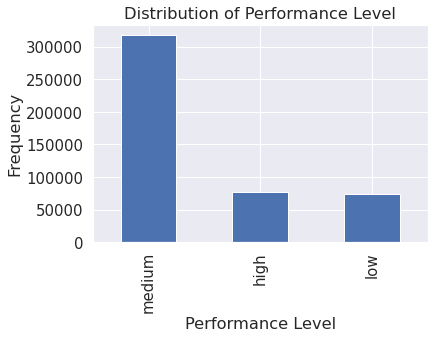

In [ ]:
import matplotlib.pyplot as plt

# Plot a bar chart of the performance_level counts
performance_level_counts.plot(kind='bar')
plt.xlabel("Performance Level")
plt.ylabel("Frequency")
plt.title("Distribution of Performance Level")
plt.show()

In [ ]:
df_copySS['label'] = df_copySS['performance_level'].replace({"low": 0, "medium": 1, "high": 2})
df_copySS

,geography,civic_education,history,mathematics,literature,foreign_language_score,mean_score,performance_level,label
0,7.75,8.75,8.25,8.2,8.00,7.6,8.091667,high,2
4,8.25,7.50,7.75,5.8,6.00,4.4,6.616667,high,2
7,6.25,8.75,5.25,5.0,6.50,8.8,6.758333,high,2
9,7.50,8.50,3.25,6.6,7.00,5.2,6.341667,medium,1
10,7.25,9.00,7.00,7.4,9.00,4.8,7.408333,high,2
...,...,...,...,...,...,...,...,...,...
811843,5.25,4.50,3.25,3.8,4.25,2.4,3.908333,low,0
811845,5.25,6.00,2.75,3.6,1.75,1.8,3.525000,low,0
811846,5.75,8.50,4.50,4.4,4.75,3.4,5.216667,medium,1
811848,5.50,8.00,5.50,2.8,5.00,2.8,4.933333,medium,1


In [ ]:
X_SS = df_copySS.drop(['mean_score', 'performance_level','label'], axis=1)
X_SS

,geography,civic_education,history,mathematics,literature,foreign_language_score
0,7.75,8.75,8.25,8.2,8.00,7.6
4,8.25,7.50,7.75,5.8,6.00,4.4
7,6.25,8.75,5.25,5.0,6.50,8.8
9,7.50,8.50,3.25,6.6,7.00,5.2
10,7.25,9.00,7.00,7.4,9.00,4.8
...,...,...,...,...,...,...
811843,5.25,4.50,3.25,3.8,4.25,2.4
811845,5.25,6.00,2.75,3.6,1.75,1.8
811846,5.75,8.50,4.50,4.4,4.75,3.4
811848,5.50,8.00,5.50,2.8,5.00,2.8


In [ ]:
y_SS = df_copySS['label']
y_SS

0         2
4         2
7         2
9         1
10        2
         ..
811843    0
811845    0
811846    1
811848    1
811849    1
Name: label, Length: 469543, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SS, y_SS, test_size=0.33, random_state=42)

# Train multiple models
models = [RandomForestClassifier(), SVC(), KNeighborsClassifier(), GaussianNB()]
model_names = ['RandomForest', 'SVM', 'KNN', 'NaiveBayes']

for idx, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_names[idx]} Accuracy: {accuracy}')

RandomForest Accuracy: 0.9818005808325266
SVM Accuracy: 0.9992836398838335
KNN Accuracy: 0.9822587931590836
NaiveBayes Accuracy: 0.9493965795417877


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy}')

# Generate classification report
report = classification_report(y_test, y_pred,labels=[0,1,2],target_names=df_copySS['performance_level'].unique())
print(f'SVM Classification Report:\n{report}')

# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(f'SVM Confusion Matrix:\n{confusion}')

SVM Accuracy: 0.9992836398838335
SVM Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00     24578
      medium       1.00      1.00      1.00    105018
         low       1.00      1.00      1.00     25354

    accuracy                           1.00    154950
   macro avg       1.00      1.00      1.00    154950
weighted avg       1.00      1.00      1.00    154950

SVM Confusion Matrix:
[[ 24535     43      0]
 [    12 104990     16]
 [     0     40  25314]]


Text(0.5, 1.0, 'CONFUSION MATRIX - SVC\n')

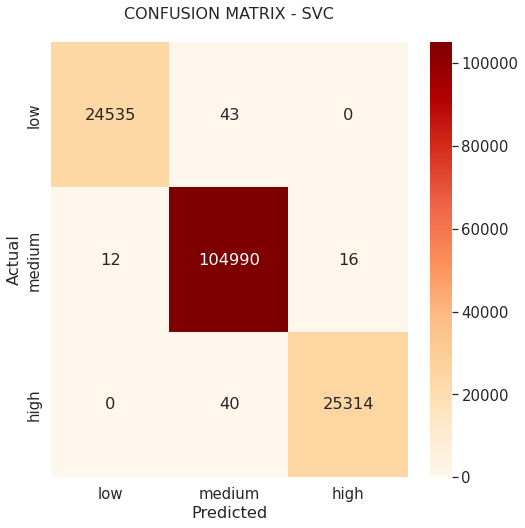

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred,labels=[0,1,2])
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat,annot=True,cmap="OrRd", fmt='d',xticklabels= ['low','medium','high'],yticklabels=['low','medium','high'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('CONFUSION MATRIX - SVC\n',size=16)

In [ ]:
# geography	civic_education	history	mathematics	literature	foreign_language_score
new_example = [[7.0, 8.0, 6.0, 7.0, 9.0, 7.0]]

new_example_class = svm_model.predict(new_example)

if new_example_class == 0:
  print('Low')
elif new_example_class == 1:
  print('Medium')
else:
  print('High')


High


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


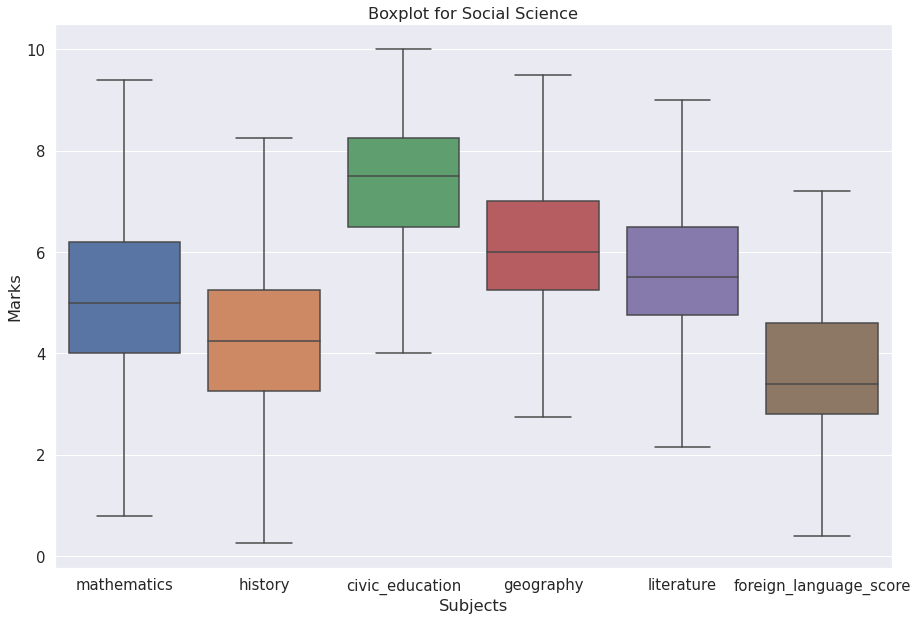

In [ ]:
plt.figure(figsize = (15, 10))
sns.set(font_scale = 1.35)
dataset = pd.DataFrame(data = Social_Science_df_cleaned, columns = ["mathematics", "history", "civic_education", "geography",
                        "literature", "foreign_language_score"])
boxplot_dataset = sns.boxplot(x="variable", y="value", data=pd.melt(dataset), showfliers =  False)
boxplot_dataset.set_xlabel("Subjects")
boxplot_dataset.set_ylabel("Marks")
plt.title("Boxplot for Social Science")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '10 Point Distributions (Social_Science)')

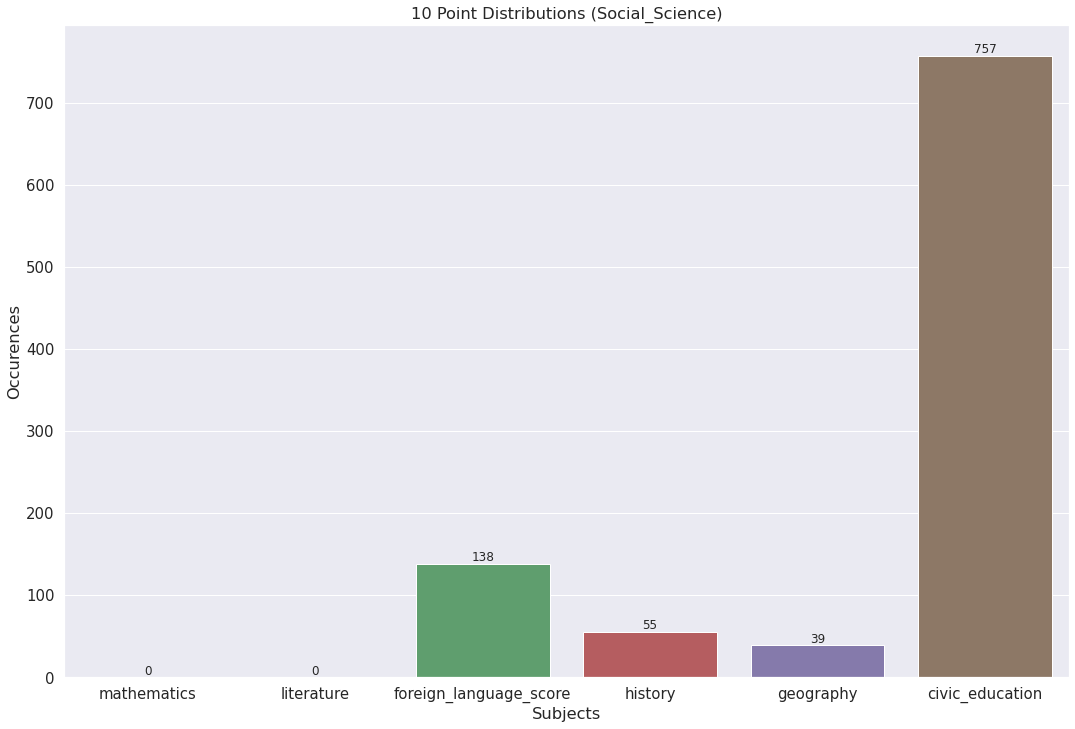

In [ ]:
math_10_score = sum(Social_Science_df_cleaned.mathematics == 10)
literature_10_score = sum(Social_Science_df_cleaned.literature == 10)
foreign_language_score_10_score = sum(Social_Science_df_cleaned.foreign_language_score == 10)
history_10_score = sum(Social_Science_df_cleaned.history == 10)
civic_education_10_score = sum(Social_Science_df_cleaned.civic_education == 10)
geography_10_score = sum(Social_Science_df_cleaned.geography == 10)


labels_10_score = ["mathematics", "literature", "foreign_language_score", "history", "geography", "civic_education"]
counts_10_score = [math_10_score, literature_10_score, foreign_language_score_10_score, history_10_score, geography_10_score,
                    civic_education_10_score]

fig, ax = plt.subplots(figsize = (18, 12))
sns.set(font_scale = 1.35)
score_10_grouped = sns.barplot(labels_10_score, counts_10_score)
score_10_grouped.set_xticklabels(score_10_grouped.get_xticklabels())
#ax.bar_label(ax.containers[0])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, ha='center', va='bottom')
plt.xlabel("Subjects")
plt.ylabel("Occurences")
plt.title("10 Point Distributions (Social_Science)")

# **กลุ่มคนที่สอบทุกวิชา**

In [ ]:
#Took_all_subjects
Took_all_subjects = df[['geography','civic_education','history','physics','chemistry','biology','mathematics','literature','foreign_language_code','foreign_language_score']].copy()
Took_all_subjects

,geography,civic_education,history,physics,chemistry,biology,mathematics,literature,foreign_language_code,foreign_language_score
0,7.75,8.75,8.25,NaN,NaN,NaN,8.2,8.00,N1,7.6
1,NaN,NaN,NaN,8.25,4.5,6.00,8.6,6.17,N1,8.0
2,4.25,5.75,4.00,NaN,NaN,NaN,5.2,4.75,NaN,NaN
3,4.75,5.00,2.25,NaN,NaN,NaN,4.4,4.50,NaN,NaN
4,8.25,7.50,7.75,NaN,NaN,NaN,5.8,6.00,N1,4.4
...,...,...,...,...,...,...,...,...,...,...
811846,5.75,8.50,4.50,NaN,NaN,NaN,4.4,4.75,N1,3.4
811847,NaN,NaN,NaN,3.75,4.5,4.00,5.2,6.25,N1,4.4
811848,5.50,8.00,5.50,NaN,NaN,NaN,2.8,5.00,N1,2.8
811849,6.75,8.50,3.50,NaN,NaN,NaN,6.2,7.25,N1,4.0


In [ ]:
Took_all_subjects_cleaned = Took_all_subjects.dropna()


In [ ]:
Took_all_subjects_cleaned.isna().sum()

geography                 0
civic_education           0
history                   0
physics                   0
chemistry                 0
biology                   0
mathematics               0
literature                0
foreign_language_code     0
foreign_language_score    0
dtype: int64

In [ ]:
Took_all_subjects_cleaned.describe()

,geography,civic_education,history,physics,chemistry,biology,mathematics,literature,foreign_language_score
count,26390.000000,26390.000000,26390.000000,26390.000000,26390.000000,26390.000000,26390.000000,26390.000000,26390.000000
mean,5.796817,6.834784,3.899128,3.948892,3.664219,3.751412,5.508427,5.050374,3.787920
std,1.131061,1.215990,1.167253,1.596021,1.401997,1.020917,1.650392,1.224377,1.602163
min,0.000000,0.000000,0.000000,0.250000,0.500000,0.500000,0.800000,0.000000,0.600000
25%,5.000000,6.000000,3.000000,2.750000,2.750000,3.000000,4.400000,4.250000,2.600000
50%,5.750000,7.000000,3.750000,3.500000,3.500000,3.750000,5.600000,5.000000,3.400000
75%,6.500000,7.750000,4.500000,5.000000,4.500000,4.500000,6.800000,6.000000,4.400000
max,9.750000,10.000000,10.000000,9.250000,9.750000,9.750000,9.600000,9.250000,10.000000


# **New**

In [ ]:
df_copyA = Took_all_subjects_cleaned[['history','civic_education','geography','physics'	,'chemistry',	'biology',	'mathematics',	'literature','foreign_language_score']].copy()
df_copyA

,history,civic_education,geography,physics,chemistry,biology,mathematics,literature,foreign_language_score
2810,5.00,8.75,6.00,4.75,4.25,4.50,4.8,5.25,5.0
2831,5.75,7.00,6.25,4.50,2.75,3.00,5.4,4.25,4.0
3988,4.75,6.25,6.25,4.25,3.75,3.25,6.6,4.00,3.0
3989,4.00,6.75,5.50,3.00,3.25,3.25,5.2,5.00,2.0
4000,3.00,6.00,4.50,3.50,2.50,5.00,5.6,4.50,2.4
...,...,...,...,...,...,...,...,...,...
808222,3.25,8.00,6.00,4.00,3.00,5.00,5.6,7.50,7.0
808226,5.00,7.25,6.50,3.75,2.50,1.75,5.0,5.00,2.6
808307,4.00,7.50,6.00,3.50,4.75,3.25,6.6,6.00,2.2
808351,4.25,6.25,5.75,3.00,2.25,2.75,4.8,4.50,3.4


In [ ]:
df_copyA["mean_score"] = df_copyA[df_copyA.columns[:]].mean(axis=1)
df_copyA

,history,civic_education,geography,physics,chemistry,biology,mathematics,literature,foreign_language_score,mean_score
2810,5.00,8.75,6.00,4.75,4.25,4.50,4.8,5.25,5.0,5.366667
2831,5.75,7.00,6.25,4.50,2.75,3.00,5.4,4.25,4.0,4.766667
3988,4.75,6.25,6.25,4.25,3.75,3.25,6.6,4.00,3.0,4.677778
3989,4.00,6.75,5.50,3.00,3.25,3.25,5.2,5.00,2.0,4.216667
4000,3.00,6.00,4.50,3.50,2.50,5.00,5.6,4.50,2.4,4.111111
...,...,...,...,...,...,...,...,...,...,...
808222,3.25,8.00,6.00,4.00,3.00,5.00,5.6,7.50,7.0,5.483333
808226,5.00,7.25,6.50,3.75,2.50,1.75,5.0,5.00,2.6,4.372222
808307,4.00,7.50,6.00,3.50,4.75,3.25,6.6,6.00,2.2,4.866667
808351,4.25,6.25,5.75,3.00,2.25,2.75,4.8,4.50,3.4,4.105556


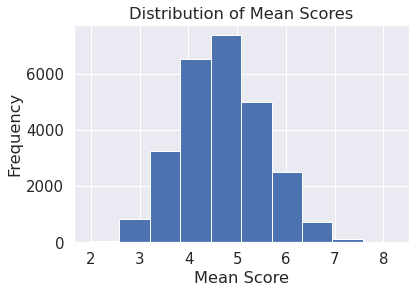

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of the mean_score column
plt.hist(df_copyA["mean_score"])
plt.xlabel("Mean Score")
plt.ylabel("Frequency")
plt.title("Distribution of Mean Scores")
plt.show()

In [ ]:
high_threshold = df_copyA['mean_score'].mean() + df_copyA['mean_score'].std()
low_threshold = df_copyA['mean_score'].mean() - df_copyA['mean_score'].std()

In [ ]:
high_threshold

5.5425648311190505

In [ ]:
low_threshold

3.8445401328824653

In [ ]:
df_copyA['performance_level'] = ['high' if score >= high_threshold else 'low' if score <= low_threshold else 'medium' for score in df_copyA["mean_score"]]

In [ ]:
# thresholds = {
#     "high": 7,
#     "low": 4
# }


In [ ]:
# df_copyA["performance_level"] = "low"
# df_copyA.loc[(df_copyA["mean_score"] >= thresholds["low"]) & (df_copyA["mean_score"] < thresholds["high"]), "performance_level"] = "medium"
# df_copyA.loc[df_copyA["mean_score"] >= thresholds["high"], "performance_level"] = "high"

In [ ]:
df_copyA

,history,civic_education,geography,physics,chemistry,biology,mathematics,literature,foreign_language_score,mean_score,performance_level
2810,5.00,8.75,6.00,4.75,4.25,4.50,4.8,5.25,5.0,5.366667,medium
2831,5.75,7.00,6.25,4.50,2.75,3.00,5.4,4.25,4.0,4.766667,medium
3988,4.75,6.25,6.25,4.25,3.75,3.25,6.6,4.00,3.0,4.677778,medium
3989,4.00,6.75,5.50,3.00,3.25,3.25,5.2,5.00,2.0,4.216667,medium
4000,3.00,6.00,4.50,3.50,2.50,5.00,5.6,4.50,2.4,4.111111,medium
...,...,...,...,...,...,...,...,...,...,...,...
808222,3.25,8.00,6.00,4.00,3.00,5.00,5.6,7.50,7.0,5.483333,medium
808226,5.00,7.25,6.50,3.75,2.50,1.75,5.0,5.00,2.6,4.372222,medium
808307,4.00,7.50,6.00,3.50,4.75,3.25,6.6,6.00,2.2,4.866667,medium
808351,4.25,6.25,5.75,3.00,2.25,2.75,4.8,4.50,3.4,4.105556,medium


In [ ]:
performance_level_counts = df_copyA['performance_level'].value_counts()
print(performance_level_counts)

medium    17729
high       4376
low        4285
Name: performance_level, dtype: int64


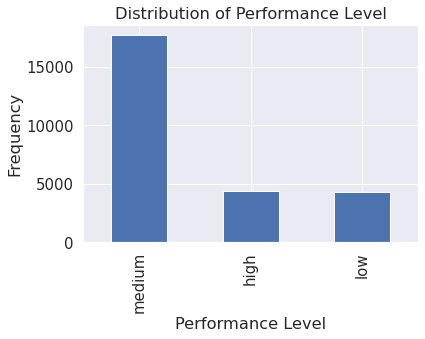

In [ ]:
import matplotlib.pyplot as plt

# Plot a bar chart of the performance_level counts
performance_level_counts.plot(kind='bar')
plt.xlabel("Performance Level")
plt.ylabel("Frequency")
plt.title("Distribution of Performance Level")
plt.show()

In [ ]:
df_copyA['label'] = df_copyA['performance_level'].replace({"low": 0, "medium": 1, "high": 2})
df_copyA

,history,civic_education,geography,physics,chemistry,biology,mathematics,literature,foreign_language_score,mean_score,performance_level,label
2810,5.00,8.75,6.00,4.75,4.25,4.50,4.8,5.25,5.0,5.366667,medium,1
2831,5.75,7.00,6.25,4.50,2.75,3.00,5.4,4.25,4.0,4.766667,medium,1
3988,4.75,6.25,6.25,4.25,3.75,3.25,6.6,4.00,3.0,4.677778,medium,1
3989,4.00,6.75,5.50,3.00,3.25,3.25,5.2,5.00,2.0,4.216667,medium,1
4000,3.00,6.00,4.50,3.50,2.50,5.00,5.6,4.50,2.4,4.111111,medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...
808222,3.25,8.00,6.00,4.00,3.00,5.00,5.6,7.50,7.0,5.483333,medium,1
808226,5.00,7.25,6.50,3.75,2.50,1.75,5.0,5.00,2.6,4.372222,medium,1
808307,4.00,7.50,6.00,3.50,4.75,3.25,6.6,6.00,2.2,4.866667,medium,1
808351,4.25,6.25,5.75,3.00,2.25,2.75,4.8,4.50,3.4,4.105556,medium,1


In [ ]:
X_A = df_copyA.drop(['mean_score', 'performance_level','label'], axis=1)
X_A

,history,civic_education,geography,physics,chemistry,biology,mathematics,literature,foreign_language_score
2810,5.00,8.75,6.00,4.75,4.25,4.50,4.8,5.25,5.0
2831,5.75,7.00,6.25,4.50,2.75,3.00,5.4,4.25,4.0
3988,4.75,6.25,6.25,4.25,3.75,3.25,6.6,4.00,3.0
3989,4.00,6.75,5.50,3.00,3.25,3.25,5.2,5.00,2.0
4000,3.00,6.00,4.50,3.50,2.50,5.00,5.6,4.50,2.4
...,...,...,...,...,...,...,...,...,...
808222,3.25,8.00,6.00,4.00,3.00,5.00,5.6,7.50,7.0
808226,5.00,7.25,6.50,3.75,2.50,1.75,5.0,5.00,2.6
808307,4.00,7.50,6.00,3.50,4.75,3.25,6.6,6.00,2.2
808351,4.25,6.25,5.75,3.00,2.25,2.75,4.8,4.50,3.4


In [ ]:
y_A = df_copyA['label']
y_A

2810      1
2831      1
3988      1
3989      1
4000      1
         ..
808222    1
808226    1
808307    1
808351    1
811781    1
Name: label, Length: 26390, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_A, y_A, test_size=0.33, random_state=42)

# Train multiple models
models = [RandomForestClassifier(), SVC(), KNeighborsClassifier(), GaussianNB()]
model_names = ['RandomForest', 'SVM', 'KNN', 'NaiveBayes']

for idx, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_names[idx]} Accuracy: {accuracy}')

RandomForest Accuracy: 0.9514295556321047
SVM Accuracy: 0.9918475140659089
KNN Accuracy: 0.9538408542886669
NaiveBayes Accuracy: 0.9249052704099208


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy}')

# Generate classification report
report = classification_report(y_test, y_pred,labels=[0,1,2],target_names=df_copyA['performance_level'].unique())
print(f'SVM Classification Report:\n{report}')

# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(f'SVM Confusion Matrix:\n{confusion}')

SVM Accuracy: 0.9918475140659089
SVM Classification Report:
              precision    recall  f1-score   support

      medium       0.99      0.99      0.99      1465
         low       0.99      1.00      0.99      5776
        high       1.00      0.98      0.99      1468

    accuracy                           0.99      8709
   macro avg       0.99      0.99      0.99      8709
weighted avg       0.99      0.99      0.99      8709

SVM Confusion Matrix:
[[1448   17    0]
 [  19 5750    7]
 [   0   28 1440]]


Text(0.5, 1.0, 'CONFUSION MATRIX - SVC\n')

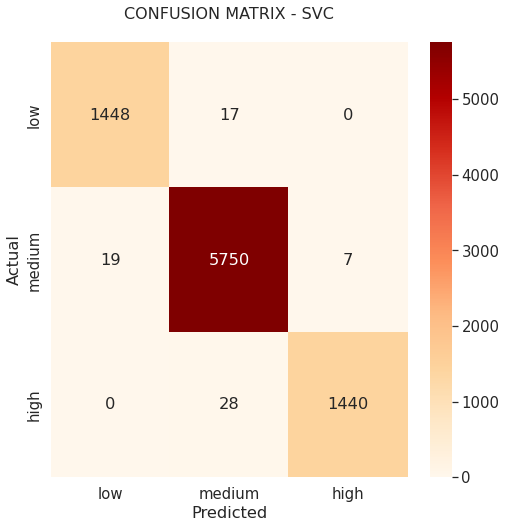

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred,labels=[0,1,2])
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat,annot=True,cmap="OrRd", fmt='d',xticklabels= ['low','medium','high'],yticklabels=['low','medium','high'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('CONFUSION MATRIX - SVC\n',size=16)

In [ ]:
# history	civic_education	geography	physics	chemistry	biology	mathematics	literature	foreign_language_score
new_example = [[4.0, 5.0, 8.0, 4.0,5.0, 4.0,8.0,7.0,3]]


new_example_class = svm_model.predict(new_example)


if new_example_class == 0:
  print('Low')
elif new_example_class == 1:
  print('Medium')
else:
  print('High')


Medium


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


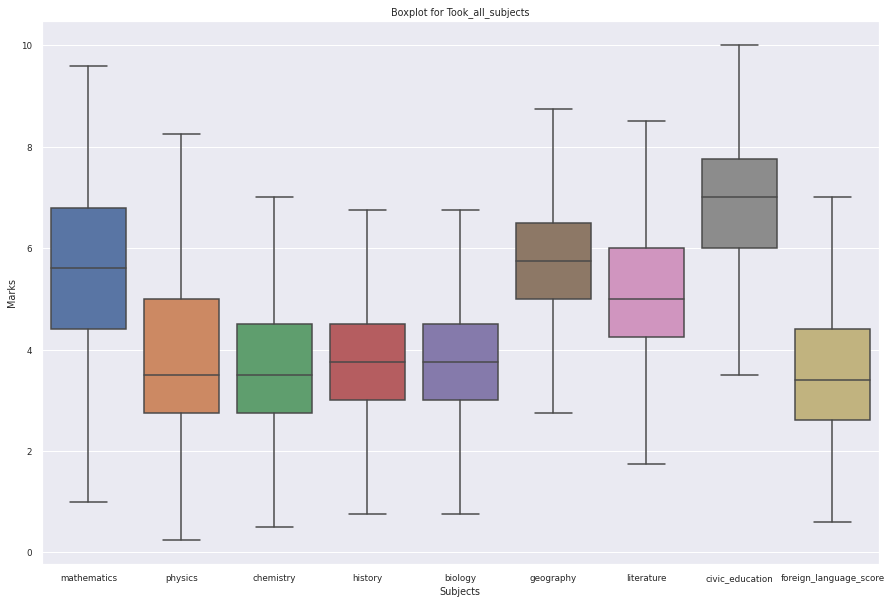

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
sns.set(font_scale = 0.8)
dataset = pd.DataFrame(data = Took_all_subjects_cleaned, columns = ["mathematics", "physics", "chemistry", "history", "biology", "geography",
                        "literature", "civic_education", "foreign_language_score"])
boxplot_dataset = sns.boxplot(x="variable", y="value", data=pd.melt(dataset), showfliers = False)
boxplot_dataset.set_xlabel("Subjects")
boxplot_dataset.set_ylabel("Marks")
plt.title("Boxplot for Took_all_subjects")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '10 Point Distributions (Took_all_subjects)')

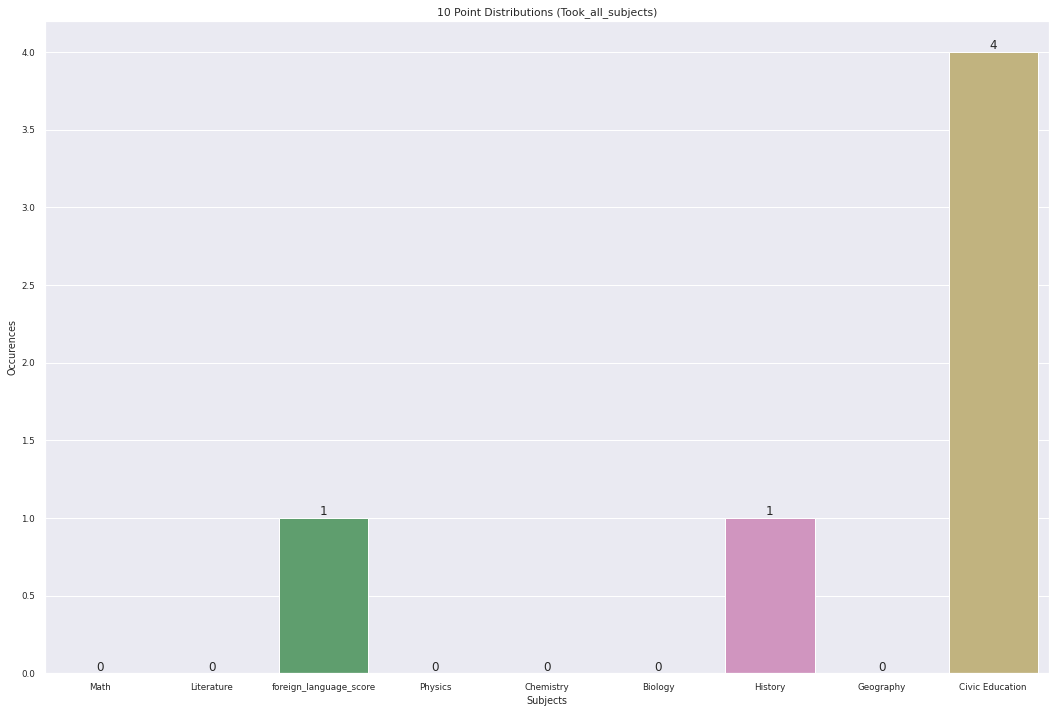

In [ ]:
# Count the number has score 10
math_10_score = sum(Took_all_subjects_cleaned.mathematics == 10)
literature_10_score = sum(Took_all_subjects_cleaned.literature == 10)
foreign_language_score_10_score = sum(Took_all_subjects_cleaned.foreign_language_score == 10)
physics_10_score = sum(Took_all_subjects_cleaned.physics == 10)
chemistry_10_score = sum(Took_all_subjects_cleaned.chemistry == 10)
biology_10_score = sum(Took_all_subjects_cleaned.biology == 10)
history_10_score = sum(Took_all_subjects_cleaned.history == 10)
geography_10_score = sum(Took_all_subjects_cleaned.geography == 10)
civic_education_10_score = sum(Took_all_subjects_cleaned.civic_education == 10)

labels_10_score = ["Math", "Literature", "foreign_language_score", "Physics", "Chemistry", "Biology", "History",
                    "Geography", "Civic Education"]
counts_10_score = [math_10_score, literature_10_score, foreign_language_score_10_score, physics_10_score, chemistry_10_score,
                    biology_10_score, history_10_score, geography_10_score, civic_education_10_score]

fig, ax = plt.subplots(figsize = (18, 12))
sns.set(font_scale = 0.9)
score_10_grouped = sns.barplot(labels_10_score, counts_10_score)
score_10_grouped.set_xticklabels(score_10_grouped.get_xticklabels())
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, ha='center', va='bottom')

plt.xlabel("Subjects")
plt.ylabel("Occurences")
plt.title("10 Point Distributions (Took_all_subjects)")

In [ ]:
len_of_Social_Science_df_cleaned = len(Social_Science_df_cleaned)
print(f'len_of_Social_Science_df_cleaned: {len_of_Social_Science_df_cleaned}')
len_of_Natural_Science_cleaned = len(Natural_Science_cleaned)
print(f'len_of_Natural_Science_cleaned: {len_of_Natural_Science_cleaned}')
len_of_Took_all_subjects_cleaned = len(Took_all_subjects_cleaned)
print(f'len_of_Took_all_subjects_cleaned: {len_of_Took_all_subjects_cleaned}')
len_of_all_data = len(df)
print(f'len_of_all_data: {len_of_all_data}')

len_of_Social_Science_df_cleaned: 469543
len_of_Natural_Science_cleaned: 279227
len_of_Took_all_subjects_cleaned: 26390
len_of_all_data: 811851


In [ ]:
sum_of_all_group_cleaned =  len_of_Social_Science_df_cleaned + len_of_Took_all_subjects_cleaned + len_of_Natural_Science_cleaned

In [ ]:
sum_of_all_group_cleaned

775160

In [ ]:
deleted_row = len_of_all_data - sum_of_all_group_cleaned
print(f'deleted_row: {deleted_row}')

deleted_row: 36691
